In [1]:
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
import torch
import torch.nn as nn #PyTorch's module wrapper
import torch.optim as optim #PyTorch's optimiser
from torch.autograd import Variable #
import numpy as np

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = iris.data # We take the first two features
X = preprocessing.normalize(X)
Y = iris.target
print(X.shape)

(150, 4)


In [4]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)

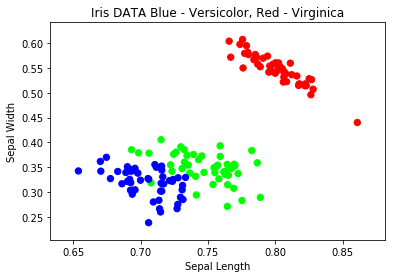

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.title('Iris DATA Blue - Versicolor, Red - Virginica')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## TensorFlow - Keras Neural Networks

model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'),
  tf.keras.layers.Dropout(0),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
]) 
adam = tf.keras.optimizers.Adam()
model2.compile(optimizer=adam,
              loss='categorical_crossentropy', # Sparse as the classification is numerical
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir="logs/".format(time))
y_pred = model2.predict_classes(x=X_test)
history = model2.fit(X_train, y_train, epochs=10, batch_size = 2, shuffle=True, callbacks=[tensorboard])
print(model2.evaluate(X_test, y_test))
print(y_pred2)

In [8]:
input_dim = 4 # The four features of the dataset

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim = input_dim), # no activation function for input
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'] )
tensorboard = TensorBoard(log_dir="/Users/jon/Documents/LSBU/2\ Statistical\ Analysis\ and\ Modeling/Paper\ 6\ January/logs/".format(time))
model.fit(X_train, y_train, epochs = 100, batch_size = 10, callbacks=[tensorboard])

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 1.1534 - acc: 0.3417
Epoch 2/100
120/120 [==============================] - 0s 361us/step - loss: 1.1413 - acc: 0.3417
Epoch 3/100
120/120 [==============================] - 0s 395us/step - loss: 1.1317 - acc: 0.3417
Epoch 4/100
120/120 [==============================] - 0s 360us/step - loss: 1.1255 - acc: 0.3417
Epoch 5/100
120/120 [==============================] - 0s 318us/step - loss: 1.1194 - acc: 0.3417
Epoch 6/100
120/120 [==============================] - 0s 308us/step - loss: 1.1144 - acc: 0.3417
Epoch 7/100
120/120 [==============================] - 0s 386us/step - loss: 1.1097 - acc: 0.3417
Epoch 8/100
120/120 [==============================] - 0s 335us/step - loss: 1.1060 - acc: 0.3417
Epoch 9/100
120/120 [==============================] - 0s 363us/step - loss: 1.1023 - acc: 0.3417
Epoch 10/100
120/120 [==============================] - 0s 370us/step - loss: 1.0993 - acc: 0.3417
Epoch 11/100
120/120 

### Accuracy of the neural network

In [9]:
prediction_tf = model.predict(X_test)

predicted_values = []
for num in range(len(prediction_tf)):
    predicted_values.append(np.argmax(prediction_tf[num]))

test_values = []
for item in y_test:
    test_values.append(np.argmax(item))
correct = 0

for prediction, test in zip(predicted_values, test_values):
    if prediction == test:
        correct = correct+1
        
accuracy = correct/len(predicted_values)

print("The accuracy of the model is: "+str(accuracy*100)+"%")

The accuracy of the model is: 96.66666666666667%


In [10]:
confusion_matrix(y_true=test_values, y_pred=predicted_values)

array([[ 8,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  9]])

## Pytorch

In [11]:
X_train_tensor = Variable(torch.FloatTensor(X_train), requires_grad = False)
y_train_tensor = Variable(torch.FloatTensor(y_train), requires_grad = False)
X_test_tensor = Variable(torch.FloatTensor(X_test), requires_grad = False)
y_test_tensor = Variable(torch.FloatTensor(y_test), requires_grad = False)

In [12]:
print(X_train_tensor[0])

tensor([0.7692, 0.3077, 0.5385, 0.1538])


In [13]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.h_layer = nn.Linear(4, 10)
        self.act_h = nn.ReLU()
        self.i_layer = nn.Linear(10, 3)
        self.s_layer = nn.Softmax()
    def forward(self,x):
        y = self.h_layer(x)
        a = self.act_h(y)
        q = self.i_layer(a)
        p = self.s_layer(q)
        return q
model_pytorch = LinearClassifier() 
loss_fn = nn.BCELoss() # calculates the loss
optim = torch.optim.Adam(model_pytorch.parameters(), lr = 0.04)

In [14]:
all_losses = []
for num in range(200): 
    pred = model_pytorch(X_train_tensor) # this predicts the class of training data
    loss = loss_fn(pred, y_train_tensor) # calculates loss based on real values
    all_losses.append(loss.data)
    optim.zero_grad()
    loss.backward() # updates the weights based on loss
    optim.step() # update optimiser for next iteration

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


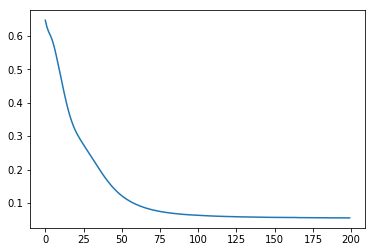

tensor([1.5540e-04, 9.2472e-01, 7.5129e-02], grad_fn=<SelectBackward>)
tensor([0., 1., 0.])
0.055241093039512634


In [15]:
%matplotlib inline
all_losses = np.array(all_losses, dtype = np.float)
plt.plot(all_losses)
plt.show()
print(pred[3])
print(y_train_tensor[3])
print(all_losses[-1])

In [16]:
from sklearn.metrics import accuracy_score
predicted_values_pytorch_tensor = []
for num in range(len(X_test_tensor)):
    predicted_values_pytorch_tensor.append(model_pytorch(X_test_tensor[num]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


In [17]:
predicted_values_pytorch = []
for item in predicted_values_pytorch_tensor:
    predicted_values_pytorch.append(np.argmax(item.data.numpy()))

print(predicted_values_pytorch)

test_values_pytorch = []
for item in y_test:
    test_values_pytorch.append(np.argmax(item))

correct_pytorch = 0
for prediction_pytorch, test_pytorch in zip(predicted_values_pytorch, test_values_pytorch):
    if prediction_pytorch == test_pytorch:
        correct_pytorch = correct_pytorch+1
        
accuracy_pytorch = correct_pytorch/len(predicted_values_pytorch)

print("The accuracy of the model using pytorch is: "+str(accuracy_pytorch*100)+"%")

[2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0]
The accuracy of the model using pytorch is: 96.66666666666667%


In [18]:
print(predicted_values_pytorch)

[2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0]


In [19]:
y_test_tensor

tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])